In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import pickle
import seaborn as sns

In [2]:
# Load the data from the first sheet
df = pd.read_excel("database2010_2019_Febcorrect3_ALBERT.xlsx", sheet_name='Sheet1')

# Display the first few rows of the dataframe to understand its structure
df.head().T

,0,1,2,3,4
Unnamed: 0,0,1,2,3,4
AIRLINE_ID,19393,19393,19393,19393,19393
YEAR,2010,2010,2010,2010,2010
QUARTER,1,1,1,2,2
AIRCRAFT_TYPE,612,616,619,612,616
DEPARTURES_PERFORMED,165438,11544,85033,176893,13069
PAYLOAD,6071574600,399422400,3180234200,6491973100,452187400
DISTANCE,2476719,918498,1772186,2491042,749103
AIR_TIME,16348801,1048743,6852866,18094482,1126033
FUEL_FLY_OPS,510427.0,35412.0,236090.0,578641.0,39337.0


In [7]:
all_flights_fuel = pd.read_excel("all_flights_fuel.xlsx")
all_flights_fuel_selected = all_flights_fuel[['ln_Average_Fuel_Price (Dollar per gallon)']]
all_flights_fuel_selected = all_flights_fuel_selected.rename(columns={'ln_Average_Fuel_Price (Dollar per gallon)': 'old_ln_Average_Fuel_Price'})
df_fuel = pd.read_csv("aggregated_data.csv")
# Concatenate the selected column to the aggregated_data dataframe
aggregated_data_with_fuel = pd.concat([df_fuel, all_flights_fuel_selected], axis=1)
aggregated_data_with_fuel.head(20)

,airline_id,name,aircraft_type,time,ln_fuel,ln_number_of_flights,ln_airborne_hours,ln_distance,ln_payload,ln_average_fuel_price,ln_fuel_price_t_minus_1,ln_fuel_price_t_minus_2,ln_fuel_price_t_minus_3,ln_fuel_price_t_minus_4,ln_fuel_price_t_minus_5,ln_fuel_price_t_minus_6,ln_fuel_price_t_minus_7,ln_fuel_price_t_minus_8,quater,old_ln_Average_Fuel_Price
0,19393,WN,B737-700,1,12.277946,12.016352,5.613529,14.722445,22.526884,0.717292,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0.717677
1,19393,WN,B737-700,2,12.394476,12.083300,5.710228,14.728212,22.593832,0.738457,0.717292,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,0.752045
2,19393,WN,B737-700,3,12.417688,12.089808,5.712907,14.728918,22.600340,0.716068,0.738457,0.717292,NaN,NaN,NaN,NaN,NaN,NaN,3,0.728514
3,19393,WN,B737-700,4,12.394437,12.076920,5.710692,14.747481,22.587452,0.821106,0.716068,0.738457,0.717292,NaN,NaN,NaN,NaN,NaN,4,0.850721
4,19393,WN,B737-700,5,12.391647,12.077216,5.715777,14.745829,22.587748,0.990071,0.821106,0.716068,0.738457,0.717292,NaN,NaN,NaN,NaN,1,0.717677
5,19393,WN,B737-700,6,12.505899,12.166968,5.815085,14.787343,22.677500,1.042554,0.990071,0.821106,0.716068,0.738457,0.717292,NaN,NaN,NaN,2,0.752045
6,19393,WN,B737-700,7,12.505624,12.170746,5.797789,14.803164,22.681278,1.007681,1.042554,0.990071,0.821106,0.716068,0.738457,0.717292,NaN,NaN,3,0.728514
7,19393,WN,B737-700,8,12.452976,12.133728,5.764627,14.776319,22.644260,0.991318,1.007681,1.042554,0.990071,0.821106,0.716068,0.738457,0.717292,NaN,4,0.850721
8,19393,WN,B737-700,9,12.430143,12.120466,5.750380,14.780840,22.572075,1.051124,0.991318,1.007681,1.042554,0.990071,0.821106,0.716068,0.738457,0.717292,1,0.717677
9,19393,WN,B737-700,10,12.546488,12.170648,5.853380,14.780035,22.622231,0.973840,1.051124,0.991318,1.007681,1.042554,0.990071,0.821106,0.716068,0.738457,2,0.752045


In [13]:
aggregated_data_with_fuel["old_Average_Fuel_Price"] = np.exp(aggregated_data_with_fuel["old_ln_Average_Fuel_Price"])
aggregated_data_with_fuel["average_Fuel_Price"] = np.exp(aggregated_data_with_fuel["ln_average_fuel_price"])
grouped_data = aggregated_data_with_fuel.groupby('time')[['old_Average_Fuel_Price', 'average_Fuel_Price']].mean().reset_index()
grouped_data.head(20)

,time,old_Average_Fuel_Price,average_Fuel_Price
0,1,2.177560,2.048877
1,2,2.158560,2.092705
2,3,2.260286,2.046371
3,4,2.172869,2.273012
4,5,2.129714,2.691425
5,6,2.121381,2.836452
6,7,2.195083,2.739242
7,8,2.172905,2.694784
8,9,2.064231,2.860866
9,10,2.150111,2.648093


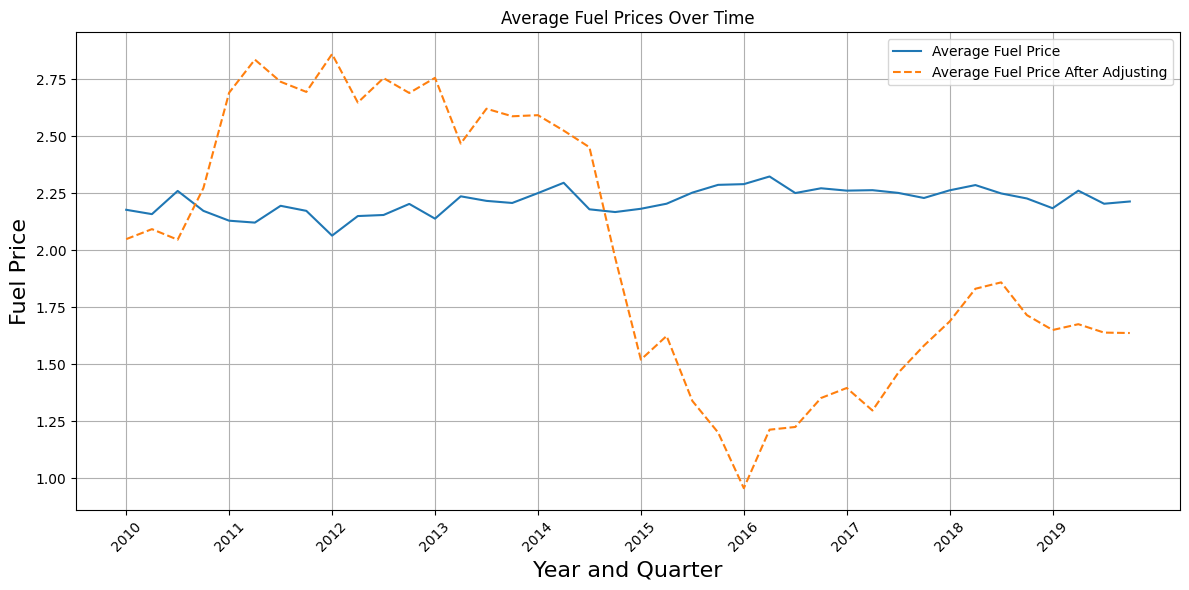

In [14]:
time_to_year_quarter = {i: f'{2010 + (i // 4)} Q{(i % 4) + 1}' for i in range(41)}
# Updating the labels to only show the year for Q1 of each year
filtered_labels = {i: f'{2010 + (i // 4)}' for i in range(40) if (i % 4) == 0}
grouped_data['Year_Quarter'] = grouped_data['time'].map(time_to_year_quarter)

# Plotting the data with updated labels
plt.figure(figsize=(12, 6))
plt.plot(grouped_data['Year_Quarter'], grouped_data['old_Average_Fuel_Price'], label='Average Fuel Price')
plt.plot(grouped_data['Year_Quarter'], grouped_data['average_Fuel_Price'], label='Average Fuel Price After Adjusting', linestyle='--')
plt.xlabel('Year and Quarter', fontsize=16)
plt.ylabel('Fuel Price', fontsize=16)
plt.title('Average Fuel Prices Over Time')

# Applying the updated labels to the x-axis
plt.xticks(ticks=list(filtered_labels.keys()), labels=list(filtered_labels.values()), rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()